In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure

from sklearn.decomposition import PCA

from itertools import combinations
from collections import Counter
import seaborn as sns

In [2]:
X_train = pd.read_csv('../data/phase1/train/X_train.txt', delim_whitespace=True, header=None)
X_test = pd.read_csv('../data/phase1/test/X_test.txt', delim_whitespace=True, header=None)

In [3]:
feature_names = pd.read_csv('../data/phase1/features.txt', delim_whitespace=True, header=None)
feature_names['dup_number'] = feature_names.reset_index().groupby(0).rank()
feature_names['features'] = feature_names.apply(
    lambda x: x[0] + ('-dup-' + str(int(x['dup_number'])) if x['dup_number']>1 else '') , axis=1)

col_names = feature_names['features'].tolist()
X_train.columns = col_names
X_test.columns = col_names

In [4]:
X_train.head(4)

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826


In [5]:
y_train = pd.read_csv('../data/phase1/train/y_train.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('../data/phase1/test/y_test.txt', delim_whitespace=True, header=None)

## Map label names:

In [6]:
label_info = pd.read_csv('../data/phase1/activity_labels.txt', delim_whitespace=True, header=None, index_col=False)
label_mapping = dict()

for index, row_data in label_info.iterrows():
    label_mapping.update({row_data[0] : row_data[1]})

In [7]:
# y_train = y_train.applymap(lambda int_value: label_mapping[int_value])
# y_test = y_test.applymap(lambda int_value: label_mapping[int_value])

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7767, 561), (3162, 561), (7767, 1), (3162, 1))

## F one way Anova

In [11]:
import scipy.stats as stats

In [12]:
groups = X_train.groupby(y_train[0]).groups.values()

In [13]:
var_vals = [stats.f_oneway(*[X_train.iloc[group, X_train.columns.get_loc(col_name)].to_list()
                      for group in groups])
            for col_name in X_train.columns]

In [14]:
print("Number of features with p-values greater than 0.05: {}".format(sum([val.pvalue > 0.05 for val in var_vals])))

Number of features with p-values greater than 0.05: 0


## Distribution of p-values

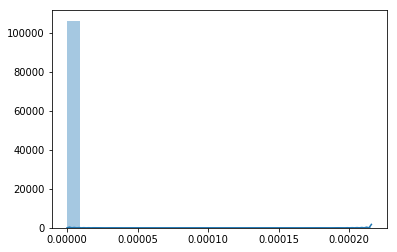

In [20]:
sns.distplot([val.pvalue for val in var_vals])

## Variance of Features

In [ ]:
sns.distplot(X_train.var())

In [ ]:
np.quantile(X_train.var(), 0.5)